In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import AllChem, Draw

In [2]:
def get_mol_with_atom_notes(molecule_smiles):
    mol = Chem.MolFromSmiles(molecule_smiles)
    for atom in mol.GetAtoms():
        atom.SetProp("atomNote", str(atom.GetIdx()))
    return mol

In [37]:

smiles1="Nc1nc2[nH]c(CCCc3cs(C(=O)O)c3)cc2c(=O)[nH]1"
smiles2="COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1"


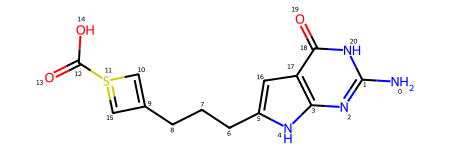

In [38]:
mol_src = get_mol_with_atom_notes(smiles1)
mol_src 

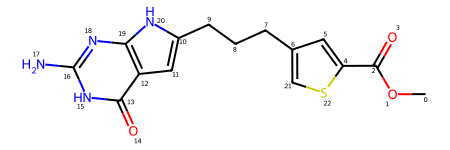

In [39]:
mol_tgt = get_mol_with_atom_notes(smiles2)
mol_tgt

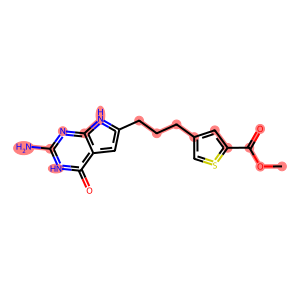

In [47]:
mol_src2= Chem.MolFromSmiles(smiles1)
mol_tgt2= Chem.MolFromSmiles(smiles2)
find_MCS =rdFMCS.FindMCS([mol_src2, mol_tgt2])
mol_mcs_01 = Chem.MolFromSmarts(find_MCS.smartsString)

# 获取第1个分子中最大公共子结构的原子匹配索引
match_atoms = mol_src.GetSubstructMatch(mol_mcs_01)


# 获取连接最大公共子结构原子的化学键
hit_bond_indices = set()
for i in range(len(match_atoms) - 1):
    bond = mol_tgt2.GetBondBetweenAtoms(match_atoms[i], match_atoms[i + 1])
    if bond:
        hit_bond_indices.add(bond.GetIdx())
# 生成原子编号的字典，用于显示在绘图中
atom_labels = {i: str(i) for i in range(mol1.GetNumAtoms())}
# 使用Draw.MolToImage绘制第二个分子，并高亮显示最大公共子结构的原子和连接的化学键
img = Draw.MolToImage(mol_tgt2, highlightAtoms=match_atoms, highlightBonds=list(hit_bond_indices), kekulize=False, atomLabels=atom_labels)
img

In [51]:

# 获取第1个分子中最大公共子结构的原子匹配索引
mol_tgt.GetSubstructMatch(mol_mcs_01)

(17, 16, 18, 19, 20, 10, 11, 12, 13, 15, 14, 9, 8, 7, 6, 5)

In [53]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
import random

# 目标分子 SMILES
tgt_smiles = "COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1"
# 源分子 SMILES
src_smiles = "Nc1nc2[nH]c(CCCc3cs(C(=O)O)c3)cc2c(=O)[nH]1"

# 创建 RDKit 分子对象
mol_tgt = Chem.MolFromSmiles(tgt_smiles)
mol_src = Chem.MolFromSmiles(src_smiles)

# 找到最大公共子结构
find_MCS = rdFMCS.FindMCS([mol_src, mol_tgt])
mcs_smarts = find_MCS.smartsString
mol_mcs = Chem.MolFromSmarts(mcs_smarts)

# 获取最大公共子结构的原子匹配索引
match_atoms = mol_src.GetSubstructMatch(mol_mcs)

# 获取连接最大公共子结构原子的化学键
hit_bond_indices = set()
for i in range(len(match_atoms) - 1):
    bond = mol_src.GetBondBetweenAtoms(match_atoms[i], match_atoms[i + 1])
    if bond:
        hit_bond_indices.add(bond.GetIdx())

# 打印最大公共子结构的 SMARTS
print("SMARTS of the common substructure:", mcs_smarts)

# 随机打乱分子结构
index_list = list(range(len(match_atoms)))
random.shuffle(index_list)

a1 = [match_atoms[n] for n in index_list]
order_s = a1 + list(set(list(range(mol_src.GetNumAtoms()))).difference(set(a1)))
random_mol_src = Chem.RenumberAtoms(mol_src, newOrder=order_s) 
ssmiles_new = Chem.MolToSmiles(random_mol_src, canonical=False)

order_t1 = [match_atoms[n] for n in index_list]
order_t1 = order_t1 + list(set(list(range(mol_tgt.GetNumAtoms()))).difference(set(order_t1)))
random_mol_tgt = Chem.RenumberAtoms(mol_tgt, newOrder=order_t1) 
tsmiles_new1 = Chem.MolToSmiles(random_mol_tgt, canonical=False)

# 打印随机打乱后的 SMILES
print(f"Randomized SMILES: {ssmiles_new} - {tsmiles_new1}")


SMARTS of the common substructure: [#7]-[#6]1:[#7]:[#6]2:[#7]:[#6](:[#6]:[#6]:2:[#6](:[#7]:1)=[#8])-[#6]-[#6]-[#6]-[#6]-,:[#6]
Randomized SMILES: C(CC1=CS(C(=O)O)=C1)Cc1cc2c([nH]1)nc(N)[nH]c2=O - C(CCc1[nH]c2nc(N)[nH]c(=O)c2c1)c1cc(C(=O)OC)sc1


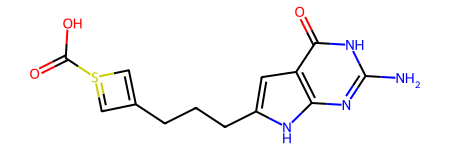

In [54]:
random_mol_src

In [2]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
import random

# 目标分子 SMILES
tgt_smiles = "COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1"
# 源分子 SMILES
src_smiles = "Nc1nc2[nH]c(CCCc3cs(C(=O)O)c3)cc2c(=O)[nH]1"

# 创建 RDKit 分子对象
mol_tgt = Chem.MolFromSmiles(tgt_smiles)
mol_src = Chem.MolFromSmiles(src_smiles)

# 打印原始 SMILES
print(f"Original SMILES: {Chem.MolToSmiles(mol_src)} - {Chem.MolToSmiles(mol_tgt)}")

# 找到最大公共子结构
find_MCS = rdFMCS.FindMCS([mol_src, mol_tgt])
mcs_smarts = find_MCS.smartsString
mol_mcs = Chem.MolFromSmarts(mcs_smarts)

# 获取最大公共子结构的原子匹配索引
match_atoms = mol_src.GetSubstructMatch(mol_mcs)

# 获取连接最大公共子结构原子的化学键
hit_bond_indices = set()
for i in range(len(match_atoms) - 1):
    bond = mol_src.GetBondBetweenAtoms(match_atoms[i], match_atoms[i + 1])
    if bond:
        hit_bond_indices.add(bond.GetIdx())

# 打印最大公共子结构的 SMARTS
print("SMARTS of the common substructure:", mcs_smarts)

# 随机打乱分子结构
index_list = list(range(len(match_atoms)))
random.shuffle(index_list)

a1 = [match_atoms[n] for n in index_list]
order_s = a1 + list(set(list(range(mol_src.GetNumAtoms()))).difference(set(a1)))
random_mol_src = Chem.RenumberAtoms(mol_src, newOrder=order_s) 
ssmiles_new = Chem.MolToSmiles(random_mol_src, canonical=False)

order_t1 = [match_atoms[n] for n in index_list]
order_t1 = order_t1 + list(set(list(range(mol_tgt.GetNumAtoms()))).difference(set(order_t1)))
random_mol_tgt = Chem.RenumberAtoms(mol_tgt, newOrder=order_t1) 
tsmiles_new1 = Chem.MolToSmiles(random_mol_tgt, canonical=False)

# 打印随机打乱后的 SMILES
print(f"Randomized SMILES: {ssmiles_new} - {tsmiles_new1}")


Original SMILES: Nc1nc2[nH]c(CCCC3=CS(C(=O)O)=C3)cc2c(=O)[nH]1 - COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1
SMARTS of the common substructure: [#7]-[#6]1:[#7]:[#6]2:[#7]:[#6](:[#6]:[#6]:2:[#6](:[#7]:1)=[#8])-[#6]-[#6]-[#6]-[#6]-,:[#6]
Randomized SMILES: [nH]1c(N)nc2c(cc(CCCC3=CS(C(=O)O)=C3)[nH]2)c1=O - [nH]1c2nc(N)[nH]c(=O)c2cc1CCCc1cc(C(OC)=O)sc1


In [40]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
import random
from rdkit.Chem.Draw import rdMolDraw2D

# 目标分子 SMILES
tgt_smiles = "COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1"
# 源分子 SMILES
src_smiles = "Nc1nc2[nH]c(CCCc3cs(C(=O)O)c3)cc2c(=O)[nH]1"

# 创建 RDKit 分子对象
mol_tgt = Chem.MolFromSmiles(tgt_smiles)
# mol_tgt = get_mol_with_atom_notes(tgt_smiles)
mol_src = Chem.MolFromSmiles(src_smiles)
# mol_src = get_mol_with_atom_notes(src_smiles)

# 打印原始 SMILES
print(f"Original SMILES:src {Chem.MolToSmiles(mol_src)} - tgt {Chem.MolToSmiles(mol_tgt)}")


find_MCS = rdFMCS.FindMCS([mol_src, mol_tgt])# 找到最大公共子结构
mcs_smarts = find_MCS.smartsString #获取最大公共子结构smarts式
mol_mcs = Chem.MolFromSmarts(mcs_smarts) #将最大公共子结构转化为mol对象

# 获取最大公共子结构的原子匹配索引
match_atoms_src = mol_src.GetSubstructMatch(mol_mcs)
match_atoms_tgt= mol_tgt.GetSubstructMatch(mol_mcs)
print(f"match_atoms: src {match_atoms_src} - tgt {match_atoms_tgt}")

# 获取最大公共子结构匹配的化学键
hit_bond_src = []
for bond in mol_mcs.GetBonds():
    aid1 = match_atoms_src[bond.GetBeginAtomIdx()]
    aid2 = match_atoms_src[bond.GetEndAtomIdx()]
    hit_bond_src.append(mol_src.GetBondBetweenAtoms(aid1, aid2).GetIdx())

hit_bond_tgt = []
for bond in mol_mcs.GetBonds():
    aid1 = match_atoms_tgt[bond.GetBeginAtomIdx()]
    aid2 = match_atoms_tgt[bond.GetEndAtomIdx()]
    hit_bond_tgt.append(mol_tgt.GetBondBetweenAtoms(aid1, aid2).GetIdx())  
    
#绘制图像并保存
src = rdMolDraw2D.MolDraw2DCairo(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(src, mol_src, highlightAtoms=list(match_atoms_src), highlightBonds=hit_bond_src)
src.FinishDrawing()
src.WriteDrawingText('src_highlighted.png')
tgt = rdMolDraw2D.MolDraw2DCairo(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(tgt, mol_tgt, highlightAtoms=list(match_atoms_tgt), highlightBonds=hit_bond_tgt)
tgt.FinishDrawing()
tgt.WriteDrawingText('tgt_highlighted.png')

Original SMILES:src Nc1nc2[nH]c(CCCC3=CS(C(=O)O)=C3)cc2c(=O)[nH]1 - tgt COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1
match_atoms: src (0, 1, 2, 3, 4, 5, 16, 17, 18, 20, 19, 6, 7, 8, 9, 15) - tgt (17, 16, 18, 19, 20, 10, 11, 12, 13, 15, 14, 9, 8, 7, 6, 5)


# 封装一下

In [13]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
import random
from rdkit.Chem.Draw import rdMolDraw2D

In [14]:
def get_mol_with_atom_notes(molecule_smiles, add_notes=True):
    mol = Chem.MolFromSmiles(molecule_smiles)
    if add_notes:
        for atom in mol.GetAtoms():
            atom.SetProp("atomNote", str(atom.GetIdx()))
    return mol


def get_mcs(smiles_list):
    mols = [get_mol_with_atom_notes(smiles) for smiles in smiles_list]
    find_MCS = rdFMCS.FindMCS(mols)
    mcs_smarts = find_MCS.smartsString
    return Chem.MolFromSmarts(mcs_smarts)

def get_atom_mapping(mol, mcs):
    return mol.GetSubstructMatch(mcs)

def get_bond_indices(mol, match_atoms, mcs):
    hit_bonds = []
    for bond in mcs.GetBonds():
        aid1 = match_atoms[bond.GetBeginAtomIdx()]
        aid2 = match_atoms[bond.GetEndAtomIdx()]
        hit_bonds.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())
    return hit_bonds

def draw_highlighted_molecule(mol, match_atoms, hit_bonds, output_filename):
    drawer = rdMolDraw2D.MolDraw2DCairo(500, 500)
    rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=list(match_atoms), highlightBonds=hit_bonds)
    drawer.FinishDrawing()
    drawer.WriteDrawingText(output_filename)


In [17]:
# 目标分子 SMILES
tgt_smiles = "COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1"
# 源分子 SMILES
src_smiles = "Nc1nc2[nH]c(CCCc3cs(C(=O)O)c3)cc2c(=O)[nH]1"
# print(f"Original SMILES:src {Chem.MolToSmiles(src_smiles)} - tgt {Chem.MolToSmiles(tgt_smiles)}")


# 创建 RDKit 分子对象
mol_src = get_mol_with_atom_notes(src_smiles, add_notes=False)  
mol_tgt = get_mol_with_atom_notes(tgt_smiles, add_notes=False)  

# 获取最大公共子结构
mol_mcs = get_mcs([src_smiles, tgt_smiles])

# 获取最大公共子结构的原子匹配索引
match_atoms_src = get_atom_mapping(mol_src, mol_mcs)
match_atoms_tgt = get_atom_mapping(mol_tgt, mol_mcs)
print(f"match_atoms: src {match_atoms_src} - tgt {match_atoms_tgt}")

# 获取最大公共子结构匹配的化学键
hit_bond_src = get_bond_indices(mol_src, match_atoms_src, mol_mcs)
hit_bond_tgt = get_bond_indices(mol_tgt, match_atoms_tgt, mol_mcs)

# 遍历所有原子并检索属性
has_atom_note_src = any(atom.HasProp("atomNote") for atom in mol_src.GetAtoms())
has_atom_note_tgt = any(atom.HasProp("atomNote") for atom in mol_tgt.GetAtoms())

# 根据是否有atomNote属性选择文件名
filename_src = 'src_highlighted_with_notes.png' if has_atom_note_src else 'src_highlighted.png'
filename_tgt = 'tgt_highlighted_with_notes.png' if has_atom_note_tgt else 'tgt_highlighted.png'

# 绘制图像并保存
draw_highlighted_molecule(mol_src, match_atoms_src, hit_bond_src, filename_src)
draw_highlighted_molecule(mol_tgt, match_atoms_tgt, hit_bond_tgt, filename_tgt)


match_atoms: src (0, 1, 2, 3, 4, 5, 16, 17, 18, 20, 19, 6, 7, 8, 9, 15) - tgt (17, 16, 18, 19, 20, 10, 11, 12, 13, 15, 14, 9, 8, 7, 6, 5)


In [18]:
# 随机打乱分子结构
index_list = list(range(len(match_atoms_src))) #创建一个包含从0到len(match_atoms_src)-1的索引的列表。
random.shuffle(index_list) #生成一个随机的索引顺序

#根据洗牌后的索引顺序，创建一个新的列表，即随机打乱MCS中的排序
mcs_random_src = [match_atoms_src[n] for n in index_list] 
mcs_random_tgt = [match_atoms_tgt[n] for n in index_list]
print(f"mcs_random: src {mcs_random_src} - tgt {mcs_random_tgt}")

#随机打乱+剩余原子
new_src = mcs_random_src + list(set(list(range(mol_src.GetNumAtoms()))).difference(set(mcs_random_src)))
new_tgt = mcs_random_tgt + list(set(list(range(mol_tgt.GetNumAtoms()))).difference(set(mcs_random_tgt)))
print(f"new_index: src {new_src} - tgt {new_tgt}")

#将分子按新index重新编号,生成新的smiles
random_mol_src = Chem.RenumberAtoms(mol_src, newOrder=new_src) 
random_mol_tgt = Chem.RenumberAtoms(mol_tgt, newOrder=new_tgt) 
new_smiles_src = Chem.MolToSmiles(random_mol_src, canonical=False)
new_smiles_tgt = Chem.MolToSmiles(random_mol_tgt, canonical=False)
print(f"new_smiles: src {new_smiles_src} - tgt {new_smiles_tgt}")


mcs_random: src [17, 5, 1, 15, 0, 4, 7, 6, 9, 16, 18, 20, 8, 2, 3, 19] - tgt [12, 10, 16, 5, 17, 20, 8, 9, 6, 11, 13, 15, 7, 18, 19, 14]
new_index: src [17, 5, 1, 15, 0, 4, 7, 6, 9, 16, 18, 20, 8, 2, 3, 19, 10, 11, 12, 13, 14] - tgt [12, 10, 16, 5, 17, 20, 8, 9, 6, 11, 13, 15, 7, 18, 19, 14, 0, 1, 2, 3, 4, 21, 22]
new_smiles: src c12cc(CCCC3=CS(C(=O)O)=C3)[nH]c1nc(N)[nH]c2=O - tgt c12cc(CCCc3cc(C(OC)=O)sc3)[nH]c1nc(N)[nH]c2=O


In [24]:
# 创建 RDKit 分子对象
new_mol_src = get_mol_with_atom_notes(new_smiles_src, add_notes=True)  
new_mol_tgt = get_mol_with_atom_notes(new_smiles_tgt, add_notes=True)  

# 获取最大公共子结构
new_mol_mcs = get_mcs([new_smiles_src, new_smiles_tgt])

# 获取最大公共子结构的原子匹配索引
new_match_atoms_src = get_atom_mapping(new_mol_src, new_mol_mcs)
new_match_atoms_tgt = get_atom_mapping(new_mol_tgt, new_mol_mcs)
print(f"new_match_atoms: src {new_match_atoms_src} - tgt {new_match_atoms_tgt}")

# 获取最大公共子结构匹配的化学键
new_hit_bond_src = get_bond_indices(new_mol_src, new_match_atoms_src, new_mol_mcs)
new_hit_bond_tgt = get_bond_indices(new_mol_tgt, new_match_atoms_tgt, new_mol_mcs)

# 遍历所有原子并检索属性
new_has_atom_note_src = any(atom.HasProp("atomNote") for atom in new_mol_src.GetAtoms())
new_has_atom_note_tgt = any(atom.HasProp("atomNote") for atom in new_mol_tgt.GetAtoms())

# 根据是否有atomNote属性选择文件名
new_filename_src = 'new_src_highlighted_with_notes.png' if new_has_atom_note_src else 'new_src_highlighted.png'
new_filename_tgt = 'new_tgt_highlighted_with_notes.png' if new_has_atom_note_tgt else 'new_tgt_highlighted.png'

# 绘制图像并保存
draw_highlighted_molecule(new_mol_src, new_match_atoms_src, new_hit_bond_src, new_filename_src)
draw_highlighted_molecule(new_mol_tgt, new_match_atoms_tgt, new_hit_bond_tgt, new_filename_tgt)


new_match_atoms: src (0, 1, 2, 13, 14, 15, 16, 18, 19, 20, 17, 3, 4, 5, 6, 12) - tgt (0, 1, 2, 15, 16, 17, 18, 20, 21, 22, 19, 3, 4, 5, 6, 7)


In [20]:
type(new_smiles_src)

str

In [21]:
type(src_smiles)

str

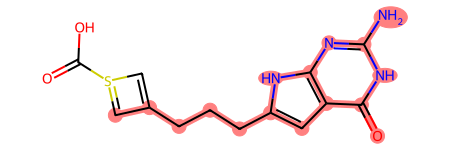

In [23]:
new_mol_src